<a href="https://colab.research.google.com/github/fjpa121197/DataScienceDM/blob/master/Lab4/Lab4_bank_clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
from sklearn.metrics import plot_confusion_matrix

In [0]:
#Read dataset 
df_1 = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4/bank-additional-full.csv", delimiter = ";")
df_2 = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4/bank-additional-full.csv", delimiter = ";")

In [0]:
#Preprocessing of data
#Turn string values to numbers  -- Credits to Varun @https://thispointer.com/how-to-get-check-data-types-of-dataframe-columns-in-python-pandas/
stringColumns = df_1.dtypes[df_1.dtypes == np.object]
stringColumnsName = list(stringColumns.index)

for x in stringColumnsName:
  df_1[[x]] = df_1[[x]].apply(LabelEncoder().fit_transform)

#Separate labels and target values
df_1x = df_1.drop(['y'],axis = 1)
df_1y = df_1['y']

In [39]:
#Decision tree classifier
tree = DecisionTreeClassifier()
scores = cross_val_score(tree, df_1x, df_1y, cv=10,scoring = make_scorer(acc))
print("ACC: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

ACC: 0.65 +/- 0.24


In [40]:
#Convert categorical values into dummy values
df_dummies = pd.get_dummies(df_2)
df_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


In [0]:
#Create a copy of current dataframe and then delete two columns (duration and y_no)
df_dummies.drop(columns=['duration','y_no'],inplace=True)

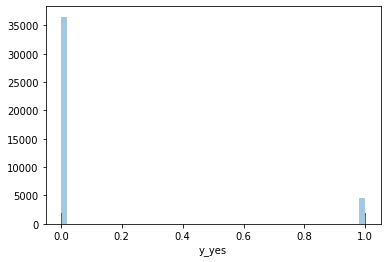

In [42]:
#Histogram of y_yes
sns_plot = sns.distplot(df_dummies['y_yes'], kde=False, rug=True)


In [0]:
#Separate labels and target values
df_dummies_x = df_dummies.drop(['y_yes'],axis = 1)
df_dummies_y = df_dummies['y_yes']

In [0]:
x_values = df_dummies_x.values
y_values = df_dummies_y.values

In [0]:
#Run a classifier
rf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=10)
scores = []
for train_index, test_index in skf.split(x_values,y_values):
    x_train, x_test = x_values[train_index], x_values[test_index]
    y_train, y_test = y_values[train_index], y_values[test_index]

    rf.fit(x_train,y_train)
    y_predict= rf.predict(x_test)
    scores.append(acc(y_test,y_predict))

In [47]:
for idx,x in enumerate(scores):
  print("Score:" + str(scores[idx]))

Score:0.8873512988589464
Score:0.8815246419033747
Score:0.15562029618839524
Score:0.7960670065549891
Score:0.6899732944889536
Score:0.4027676620538966
Score:0.31706724933236224
Score:0.08400097110949259
Score:0.277804759592035
Score:0.20422535211267606


(0, 0.1766019070239087)

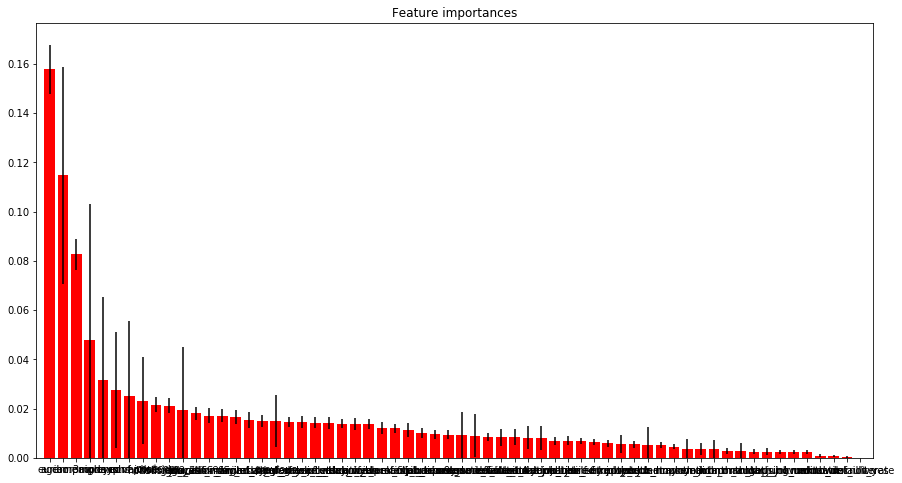

In [68]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]
features = list(df_dummies_x)
# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])


In [0]:
#Got it from lecture jupyter notebook
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 

Normalized confusion matrix


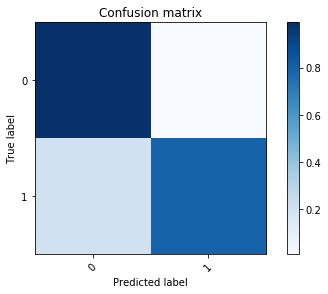

In [63]:
# Compute confusion matrix
y_pred = rf.predict(x_values)
cnf_matrix = confusion_matrix(y_values, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y_values))), normalize = True,
                      title='Confusion matrix')

#plt.savefig("confusion.png",bbox_inches='tight')
#plt.savefig("confusion.pdf",bbox_inches='tight')